### Minimal Example

Generate a square wordcloud from the us constitution using default argument:

In [22]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# read the file in
text = open('constitution.txt').read()

In [24]:
# generate a wordcloud
wordcld = WordCloud().generate(text)

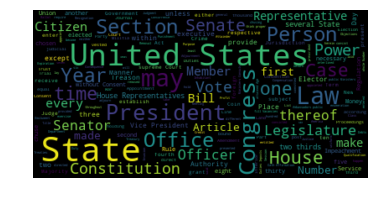

In [30]:
# Display the generated image:
# use matplotlib
plt.imshow(wordcld, interpolation='bilinear')
plt.axis('off')
plt.show()

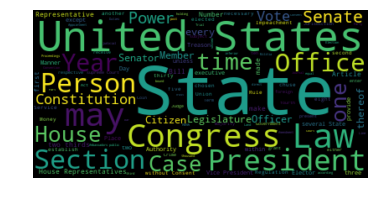

In [41]:
# lower max_font_size
wordcld = WordCloud(max_font_size=80).generate(text)
plt.figure()
plt.imshow(wordcld, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
# another way to show the wordcloud img
img = wordcld.to_image()
img.show()

### masked wordcloud

 Use a mask you can **generate** wordcloud in arbitrary shapes

In [45]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [46]:
text = open('alice.txt').read()

In [47]:
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open('alice_mask.png'))


In [48]:
stopwords = set(STOPWORDS)
stopwords.add('said')

In [49]:
wcld = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wcld.generate(text)

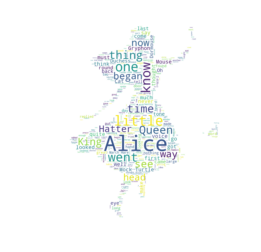

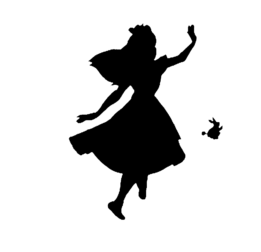

In [52]:
#show
plt.imshow(wcld, interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# save img to file
wcld.to_file('alice.png')

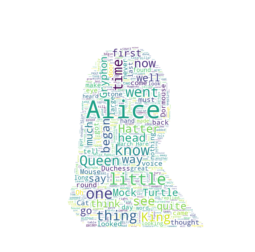

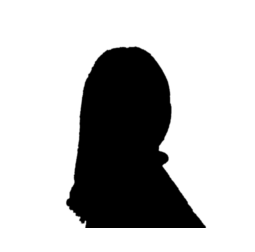

In [55]:
xx_mask = np.array(Image.open('xx_mask.png'))
xx_wcld = WordCloud(background_color='white', max_words=2000, mask=xx_mask, stopwords=stopwords)
xx_wcld.generate(text)

plt.imshow(xx_wcld, interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.imshow(xx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()


In [56]:

# save img to file
xx_wcld.to_file('xx_wcld.png')

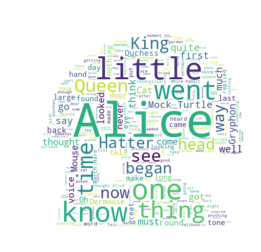

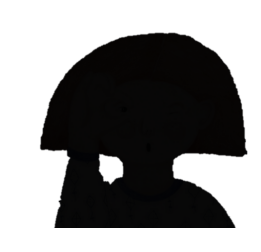

In [65]:
gg_mask = np.array(Image.open('gg_mask.png'))
gg_wcld = WordCloud(background_color='white', max_words=2000, mask=gg_mask, stopwords=stopwords)
gg_wcld.generate(text)

plt.imshow(gg_wcld, interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.imshow(gg_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:

# save img to file
gg_wcld.to_file('gg_wcld.png')

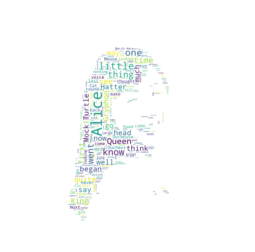

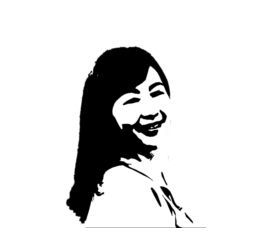

In [67]:
xx_mask = np.array(Image.open('xx_mask2.png'))
xx_wcld = WordCloud(background_color='white', max_words=2000, mask=xx_mask, stopwords=stopwords)
xx_wcld.generate(text)

plt.imshow(xx_wcld, interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.imshow(xx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
# save img to file
xx_wcld.to_file('xx_wcld.png')

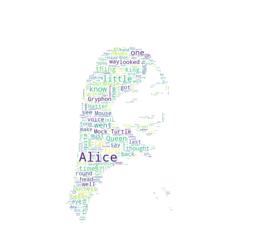

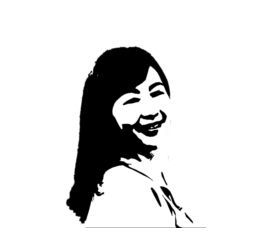

In [86]:
xx_mask = np.array(Image.open('xx_mask2.png'))
xx_wcld = WordCloud(background_color='white',max_font_size= 50, max_words=3000, mask=xx_mask, stopwords=stopwords)
xx_wcld.generate(text)

plt.imshow(xx_wcld, interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.imshow(xx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [84]:
xx_wcld.to_file('xx_wcld2.png')

### Use custom colors

Use the recolor method and custom coloring functions.

In [88]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

In [143]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 0%%, %d%%)" % random.randint(40, 80)

In [150]:
mask = np.array(Image.open('stormtrooper_mask.png'))
text = open('a_new_hope.txt').read()

In [151]:
text = text.replace('HAN','Han')
text = text.replace("LUKE's", "Luke")

In [152]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [153]:
wc = WordCloud(max_words=2000, mask=mask, 
               stopwords=stopwords, margin=10, 
               random_state=1).generate(text)

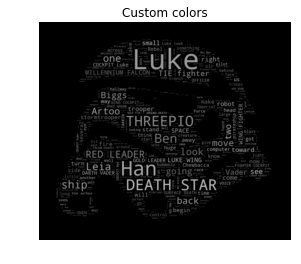

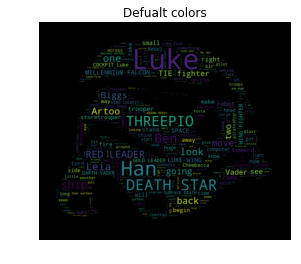

In [154]:
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=0.5),
           interpolation='bilinear')
wc.to_file('a_new_hope.png')
plt.axis('off')
plt.figure()
plt.title('Defualt colors')
plt.imshow(default_colors, interpolation='bilinear')
plt.axis('off')
plt.show()

### Colored by Group Example

Generating a word cloud that assigns colors to words based on a predefined mapping from colors to words


In [302]:
from wordcloud import  WordCloud, get_single_color_func
import matplotlib.pyplot as plt

In [303]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.
       Uses wordcloud.get_single_color_func
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


In [304]:
text = """The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""


In [333]:
# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(color_func=image_colors,collocations=False,mask=xx_coloring,background_color='black').generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

In [346]:
# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'white'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)


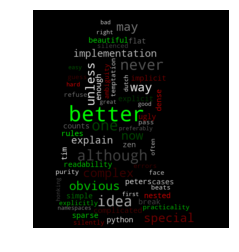

In [347]:
# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Emoji Example
---

A simple example that shows how to include emoji.  Note that this example does not seem to work on OS X, but does
work correctly in Ubuntu.

**There are 3 important steps to follow to include emoji:**

1.  Read the text input with io.open instead of the built in open.  This ensures that it is loaded as UTF-8

2.  Override the regular expression used by word cloud to parse the text into words.  The default expression will only match ascii words

3.  Override the default font to something that supports emoji.  The included Symbola font includes black and white outlines for most emoji.  There are currently issues with the PIL/Pillow library that seem to prevent it from functioning correctly on OS X (https://github.com/python-pillow/Pillow/issues/1774), so try this on ubuntu if you are having problems.


In [168]:
import io
import string
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [189]:
text = io.open('happy-emoji.txt').read()

# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

In [190]:
wordcloud = WordCloud(font_path="Symbola.ttf", regexp=regexp).generate(text)

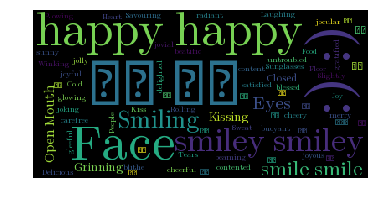

In [191]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Frequency


In [279]:
import multidict as multidict

import numpy as np
import time

import re
from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [284]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 0%%, %d%%)" % random.randint(0, 50)

def getFrequencyDictForText(sentence):
    fullTermsDict = dict()

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be",text):
            continue
        fullTermsDict[text] = fullTermsDict.get(text,0) +1

    return fullTermsDict

def makeImage(text):
    alice_mask = np.array(Image.open("alice_color.png"))
    


    wc = WordCloud(stopwords=stopwords,background_color="white", max_words=2000,max_font_size=100, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)
    #wc = wc.recolor(color_func=image_colors)
    wc.to_file('alice_color_wc.png')

    # show
    plt.imshow(wc,interpolation='bilinear')

    plt.axis("off")
    plt.show()

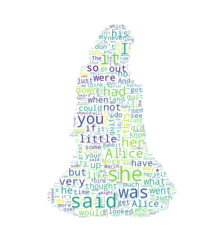

In [286]:
text = open('alice.txt').read()
makeImage(getFrequencyDictForText(text))


### Image-colored wordcloud
---
使用wordcloud 下的ImageColorGenerator 可以生成基于给定照片的色系.
按照图片上不同区域的色块为word着色.

You can color a word-cloud by using an image-based coloring strategy
implemented in ImageColorGenerator. It uses the average color of the region
occupied by the word in a source image. You can combine this with masking -
pure-white will be interpreted as 'don't occupy' by the WordCloud object when
passed as mask.

If you want white as a legal color, you can just pass a different image to
"mask", but make sure the image shapes line up.

In [288]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = open('alice.txt').read()

In [294]:
# Read the mask/ color image 
xx_coloring = np.array(Image.open('xx_color.png'))
stopwords = set(STOPWORDS)
stopwords.add('said')

wc = WordCloud(background_color='white', max_words=2000, mask= xx_coloring,
              stopwords = stopwords, max_font_size = 40, random_state = 42)

# generate wordcloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(xx_coloring)


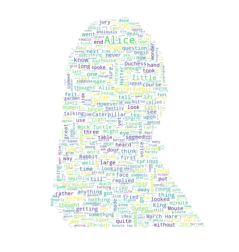

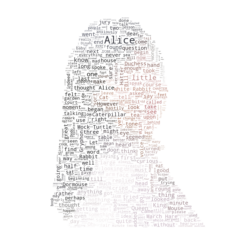

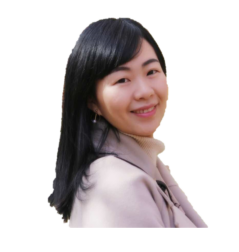

In [295]:
#show
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.figure()

# recolor wordcloud and show
# we could also give color_func = image_color directly in the constructor

plt.imshow(wc.recolor(color_func= image_colors), interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.imshow(xx_coloring, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()